The purpose of this notebook is to demonstrate how to map encoded variables within U.S. Mortality data published by the National Center of Healthcare Statistics (NCHS). Specifically, I map "race and Hispanic origin" variables within the 2022 Mortality Multiple Cause data located at https://www.cdc.gov/nchs/data_access/vitalstatsonline.htm. Code is also provided to create a simple Dash app visualization exploring these race/ethnicity variables, the outputs of which are explorable at https://dataforpublichealth.digital/viz/nchs_2022_re/ 

Preparation of these 2022 NCHS data (mort2022_cleaned.csv) is covered at https://dataforpublichealth.com/public/post-details/us-mortality-nchs

In [113]:
# Import libraries
import pandas as pd

# Import 2022 data
df = pd.read_csv('mort2022_cleaned.csv', low_memory=False)

# Print unique columns
print(df.columns)

# Print shape
print(df.shape)

Index(['record_type', 'resident_status', 'education_2003', 'education_flag',
       'month_of_death', 'sex', 'detail_age', 'age_sub_flag', 'age_recode_52',
       'age_recode_27', 'age_recode_12', 'infant_age_recode_22',
       'place_of_death', 'marital_status', 'day_of_week_of_death',
       'current_data_year', 'injury_at_work', 'manner_of_death',
       'method_of_disposition', 'autopsy', 'activity_code',
       'place_of_causal_injury', 'icd10', '358_cause_recode',
       '113_cause_recode', '130_infant_cause_recode', '39_cause_recode',
       'num_entity_axis_conditions', 'cert_dx1', 'cert_dx2', 'cert_dx3',
       'cert_dx4', 'cert_dx5', 'cert_dx6', 'cert_dx7', 'cert_dx8', 'cert_dx9',
       'cert_dx10', 'cert_dx11', 'cert_dx12', 'cert_dx13', 'cert_dx14',
       'cert_dx15', 'cert_dx16', 'cert_dx17', 'cert_dx18', 'cert_dx19',
       'cert_dx20', 'num_record_axis_conditions', 'dx1', 'dx2', 'dx3', 'dx4',
       'dx5', 'dx6', 'dx7', 'dx8', 'dx9', 'dx10', 'dx11', 'dx12', 'dx13',
    

In [115]:
# Only keep the columns we need
df = df[['race_recode_6', 'hispanic_origin', 'hispanic_origin_race_recode',
       'race_recode_40']]

# Print number of rows with missing data
print('Number of rows with missing data:', df.isnull().sum().sum())

# Print shape of initial data frame
print('Shape of initial dataframe:', df.shape)

# Drop duplicate rows
df2 = df.drop_duplicates()

# Print shape
print('Shape of data after dropping duplicates:', df2.shape)

# Export filtered dataset to csv
df2.to_csv('data.csv', index=False)

Number of rows with missing data: 0
Shape of initial dataframe: (3289569, 4)
Shape of data after dropping duplicates: (532, 4)


Of the 3,289,569 rows of data, only 532 unique combinations of our 4 variables of interest are present.

In [116]:
import pandas as pd

# Load the data
file_path = 'data.csv'
data = pd.read_csv(file_path)

# Print the first few rows of the DataFrame
print(data.head())

   race_recode_6  hispanic_origin  hispanic_origin_race_recode  race_recode_40
0              2              100                            9               2
1              1              100                            8               1
2              3              100                           10               3
3              4              100                           11              10
4              6              100                           13              19


In [117]:
# Print unique values of hispanic_origin
print(data['hispanic_origin_race_recode'].unique())

[ 9  8 10 11 13  7 14 12  2  1  3  4  6  5]


In [118]:
# Create dictionaries and map values of race_recode_40, race_recode_6, hispanic_origin, and hispanic_origin_race_recode to their corresponding categories
rr40_map = {
    1: "White",
    2: "Black",
    3: "American Indian and Alaskan Native (AIAN)",
    4: "Asian Indian",
    5: "Chinese",
    6: "Filipino",
    7: "Japanese",
    8: "Korean",
    9: "Vietnamese",
    10: "Other or Multiple Asian",
    11: "Hawaiian",
    12: "Guamanian",
    13: "Samoan",
    14: "Other or Multiple Pacific Islander",
    15: "Black and White",
    16: "Black and AIAN",
    17: "Black and Asian",
    18: "Black and Native Hawaiian or Other Pacific Islander (NHOPI)",
    19: "AIAN and White",
    20: "AIAN and Asian",
    21: "AIAN and NHOPI",
    22: "Asian and White",
    23: "Asian and NHOPI",
    24: "NHOPI and White",
    25: "Black, AIAN and White",
    26: "Black, AIAN and Asian",
    27: "Black, AIAN and NHOPI",
    28: "Black, Asian and White",
    29: "Black, Asian and NHOPI",
    30: "Black, NHOPI and White",
    31: "AIAN, Asian and White",
    32: "AIAN, NHOPI and White",
    33: "AIAN, Asian and NHOPI",
    34: "Asian, NHOPI and White",
    35: "Black, AIAN, Asian and White",
    36: "Black, AIAN, Asian and NHOPI",
    37: "Black, AIAN, NHOPI and White",
    38: "Black, Asian, NHOPI and White",
    39: "AIAN, Asian, NHOPI and White",
    40: "Black, AIAN, Asian, NHOPI and White"
}

rr6_map = {
    1: "White (only)",
    2: "Black (only)",
    3: "American Indian and Alaskan Native (only))",
    4: "Asian (only)",
    5: "Native Hawaiian and Other Pacific Islander (only)",
    6: "More than one race"
}

hor_map = {
    1: "Mexican",
    2: "Puerto Rican",
    3: "Cuban",
    4: "Dominican",
    5: "Central American",
    6: "South American",
    7: "Other or Unknown Hispanic",
    8: "Non-Hispanic White (only)",
    9: "Non-Hispanic Black (only)",
    10: "Non-Hispanic American Indian and Alaskan Native (only)",
    11: "Non-Hispanic Asian (only)",
    12: "Non-Hispanic Native Hawaiian and Other Pacific Islander (only)",
    13: "Non-Hispanic More than one race",
    14: "Hispanic origin unknown or not stated"
}


# Create new columns rr40, rr6, and hisp in data called that map to the respective categories
data['rr40'] = data['race_recode_40'].map(rr40_map)
data['rr6'] = data['race_recode_6'].map(rr6_map)
data['hor'] = data['hispanic_origin_race_recode'].map(hor_map)

hisp_map = {
    range(100, 200): "Non-Hispanic",
    range(200, 210): "Spaniard",
    range(210, 220): "Mexican",
    range(220, 231): "Central American",
    range(231, 250): "South American",
    range(250, 260): "Latin American",
    range(260, 270): "Puerto Rican",
    range(270, 275): "Cuban",
    range(275, 280): "Dominican",
    range(280, 300): "Other Hispanic",
    range(996, 1000): "Unknown"
}

def map_hispanic_origin(value):
    for key in hisp_map:
        if value in key:
            return hisp_map[key]
    return "Unknown"

# Convert hispanic_origin to integer
data['hispanic_origin'] = data['hispanic_origin'].astype(int)

# Map hispanic_origin to categories
data['hisp'] = data['hispanic_origin'].apply(map_hispanic_origin)

# Print the first few rows of the DataFrame
print(data.head())

   race_recode_6  hispanic_origin  hispanic_origin_race_recode  \
0              2              100                            9   
1              1              100                            8   
2              3              100                           10   
3              4              100                           11   
4              6              100                           13   

   race_recode_40                                       rr40  \
0               2                                      Black   
1               1                                      White   
2               3  American Indian and Alaskan Native (AIAN)   
3              10                    Other or Multiple Asian   
4              19                             AIAN and White   

                                          rr6  \
0                                Black (only)   
1                                White (only)   
2  American Indian and Alaskan Native (only))   
3                     

In [119]:
# Group by the unique combinations and count the occurrences
record_counts = df.groupby(['race_recode_40', 'race_recode_6', 'hispanic_origin', 'hispanic_origin_race_recode']).size().reset_index(name='records')

# Merge the counts back into the original data
data = data.merge(record_counts, on=['race_recode_40', 'race_recode_6', 'hispanic_origin', 'hispanic_origin_race_recode'], how='left')

# Print the first few rows of the updated DataFrame
print(data.head())

# Update data.csv
data.to_csv('data.csv', index=False)


   race_recode_6  hispanic_origin  hispanic_origin_race_recode  \
0              2              100                            9   
1              1              100                            8   
2              3              100                           10   
3              4              100                           11   
4              6              100                           13   

   race_recode_40                                       rr40  \
0               2                                      Black   
1               1                                      White   
2               3  American Indian and Alaskan Native (AIAN)   
3              10                    Other or Multiple Asian   
4              19                             AIAN and White   

                                          rr6  \
0                                Black (only)   
1                                White (only)   
2  American Indian and Alaskan Native (only))   
3                     

In [ ]:
# Sum the records column to get the total number of records
total_records = data['records'].sum()
print('Total number of records:', total_records)

Total number of records: 3289569


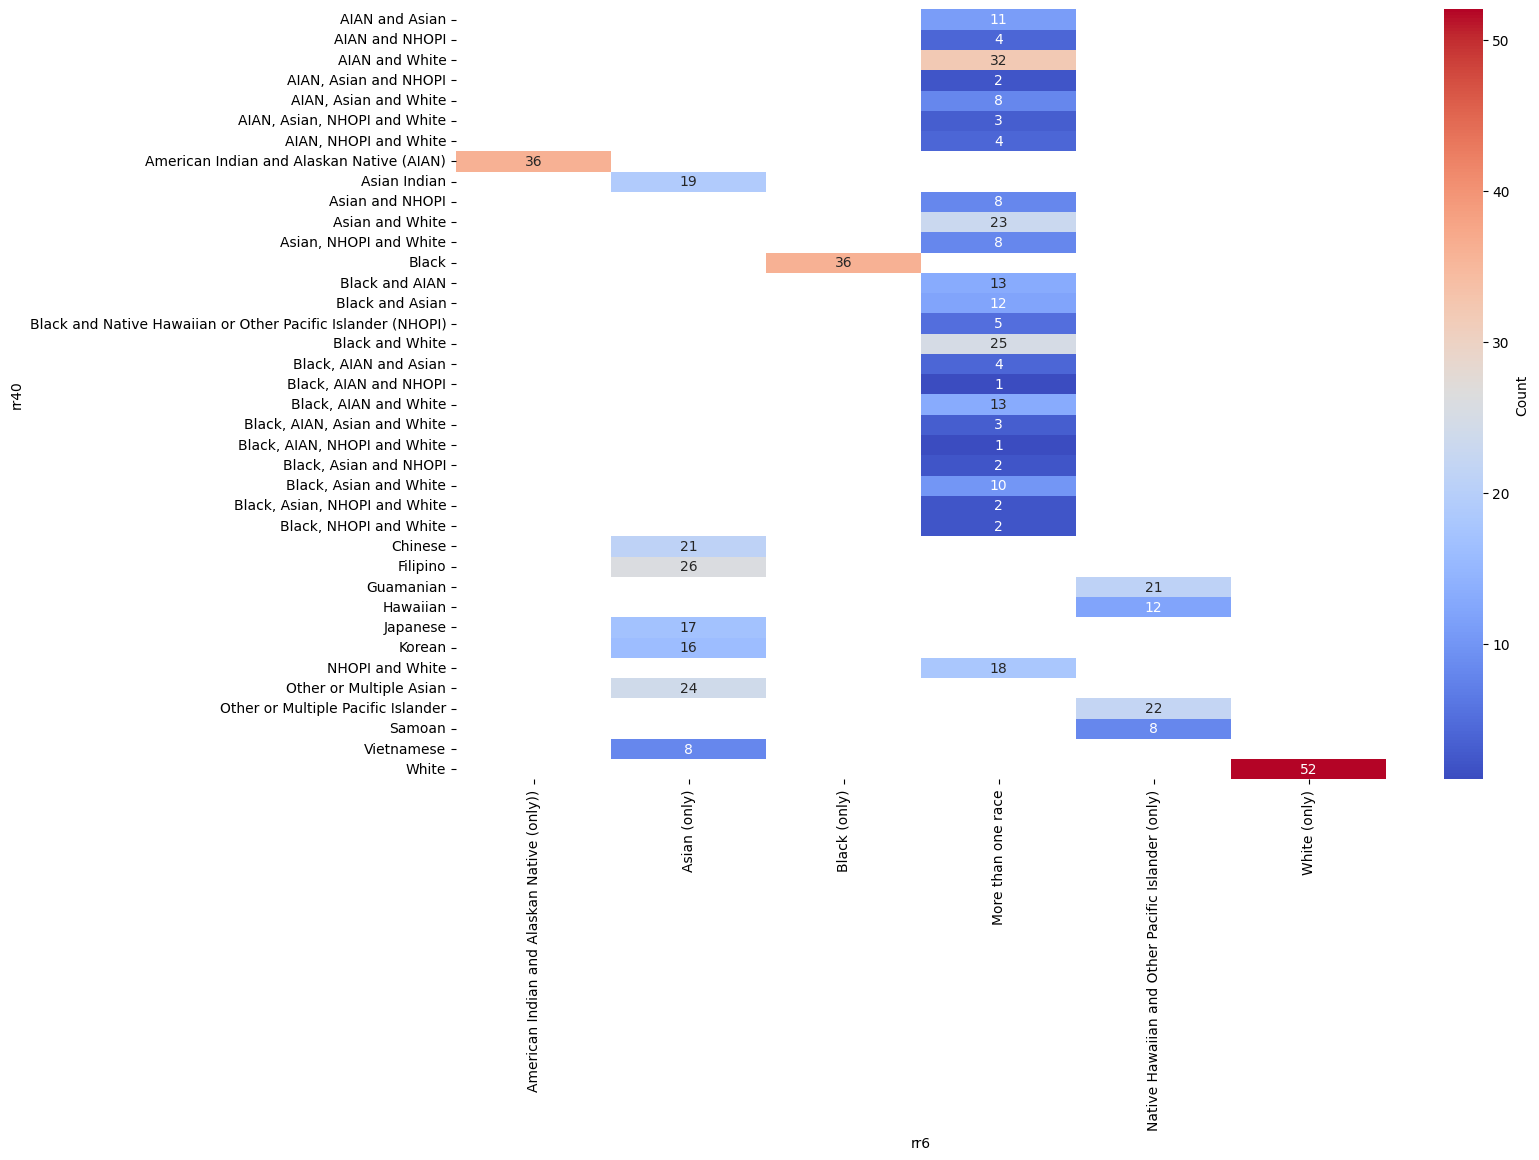

In [103]:
# Plot heatmap of race_recode_6 on the x-axis and race_recode_40 on the y-axis
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pivot table
pivot_table = data.pivot_table(index='rr40', columns='rr6', aggfunc='size', fill_value=0)

# Set the figure size to adjust height and width
plt.figure(figsize=(15, 10))

# Plot the heatmap with 0 values in white
sns.heatmap(pivot_table, cmap='coolwarm', mask=(pivot_table == 0), cbar_kws={'label': 'Count'}, annot=True)
plt.show()

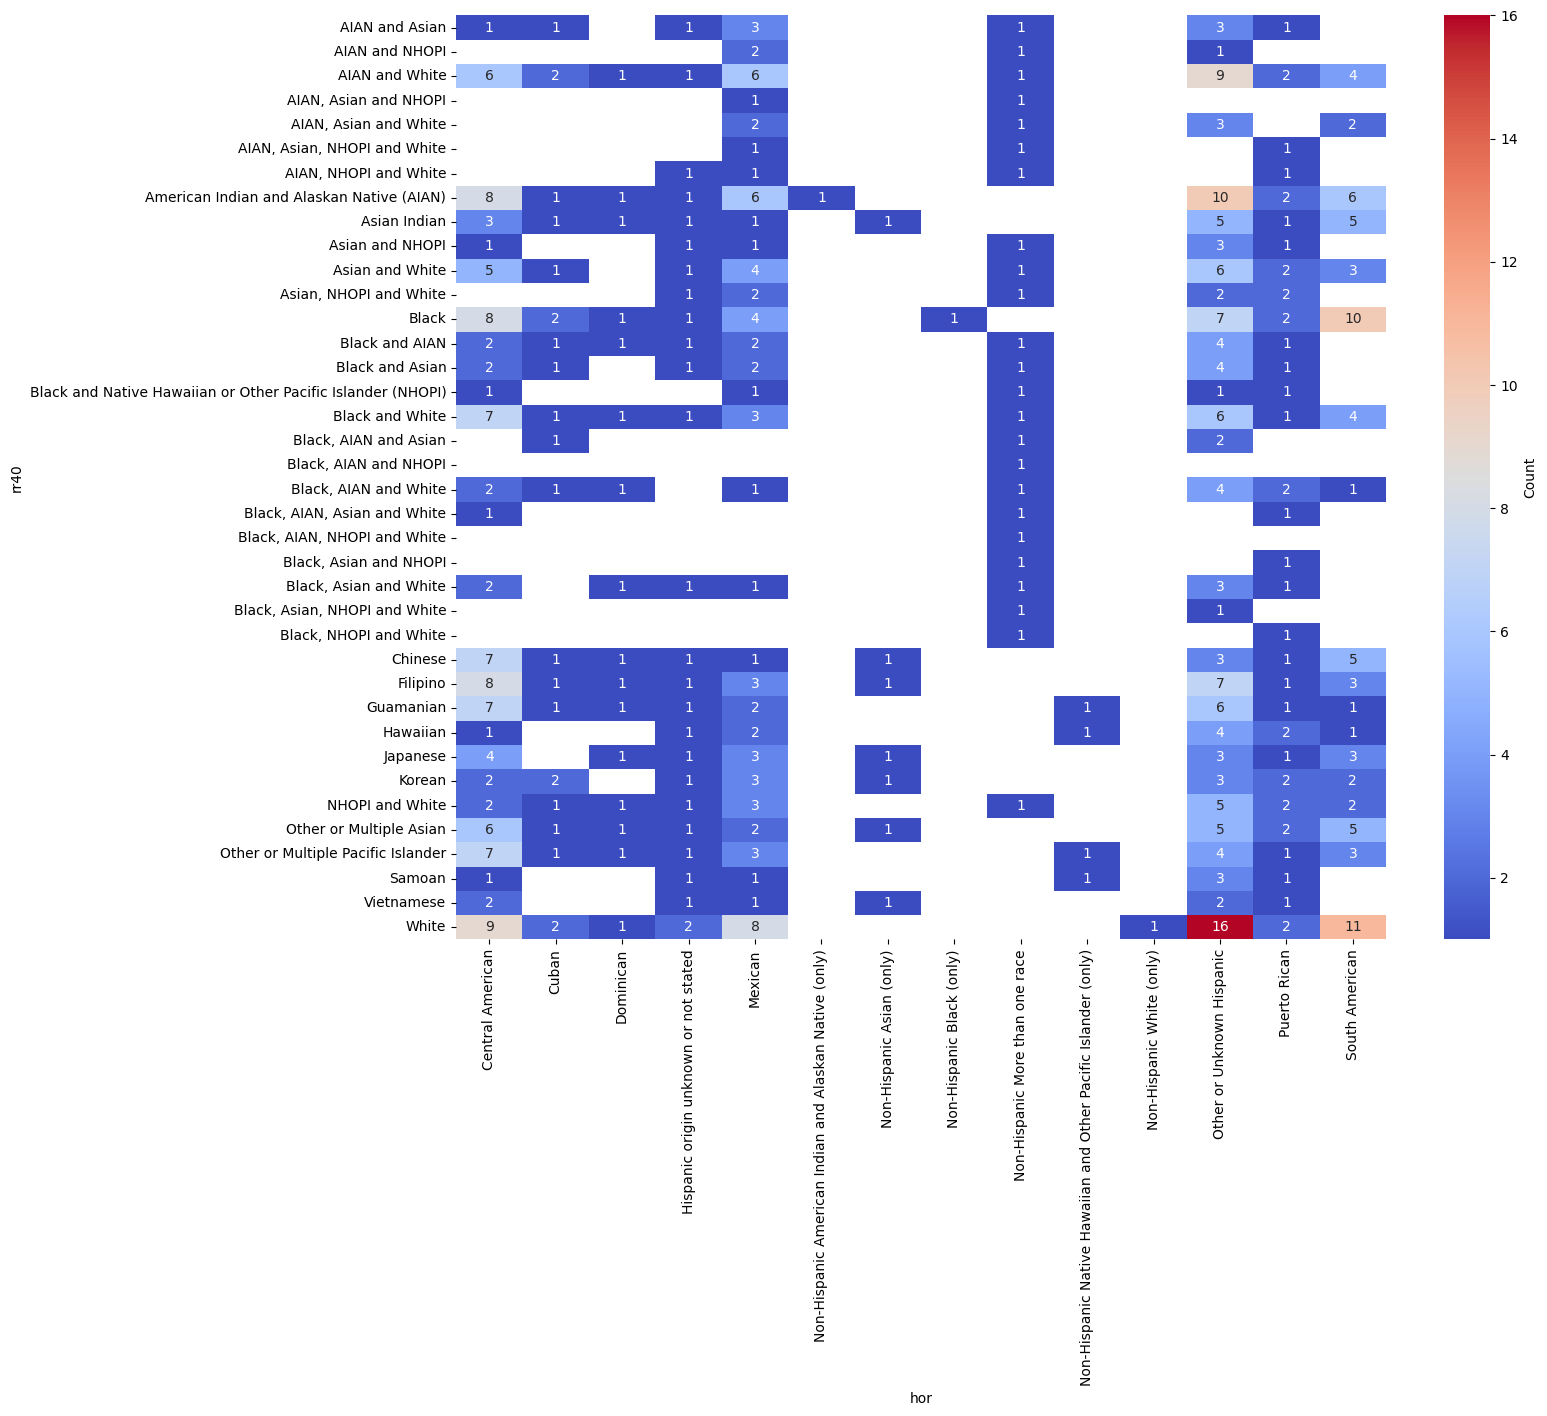

In [55]:
# Plot heatmap of race_recode_6 on the x-axis and race_recode_40 on the y-axis
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pivot table
pivot_table = data.pivot_table(index='rr40', columns='hor', aggfunc='size', fill_value=0)

# Set the figure size to adjust height and width
plt.figure(figsize=(15, 12))

# Plot the heatmap with 0 values in white
sns.heatmap(pivot_table, cmap='coolwarm', mask=(pivot_table == 0), cbar_kws={'label': 'Count'}, annot=True)
plt.show()

In [ ]:
# Save data to a new CSV file
data.to_csv('data_prepped.csv', index=False)

In [134]:
import dash
from dash import dcc, html, Input, Output
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# Load the data
data = pd.read_csv('data.csv')

# Map aliases to column names
alias_map = {
    "Race Recode 6": "rr6",
    "Race Recode 40": "rr40",
    "Hispanic Origin/Race Recode": "hor",
    "Hispanic Origin": "hisp"
}
reverse_alias_map = {v: k for k, v in alias_map.items()}

# Dash App Initialization
app = dash.Dash(__name__)

# App Layout
app.layout = html.Div([
    html.H1("Heatmap Visualization Dashboard", style={'textAlign': 'center'}),
    html.Div([
        html.Div([
            html.Label("Select X-axis Variable:", style={'fontWeight': 'bold', 'fontSize': '16px'}),
            dcc.Dropdown(
                id='x-axis',
                options=[{'label': alias, 'value': col} for alias, col in alias_map.items()],
                value='rr6',
                style={'width': '300px'}
            )
        ], style={'display': 'inline-block', 'margin-right': '20px'}),
        html.Div([
            html.Label("Select Y-axis Variable:", style={'fontWeight': 'bold', 'fontSize': '16px'}),
            dcc.Dropdown(
                id='y-axis',
                options=[{'label': alias, 'value': col} for alias, col in alias_map.items()],
                value='rr40',
                style={'width': '300px'}
            )
        ], style={'display': 'inline-block', 'margin-right': '20px'}),
        html.Div([
            html.Label("Display Mode:", style={'fontWeight': 'bold', 'fontSize': '16px', 'margin-bottom': '10px'}),
            dcc.RadioItems(
                id='display-mode',
                options=[
                    {'label': 'Unique Categories', 'value': 'counts'},
                    {'label': 'Mortality Records', 'value': 'sums'}
                ],
                value='counts',
                inputStyle={'margin-right': '10px'},
                labelStyle={'display': 'block'},  # Vertical alignment
                style={'textAlign': 'center', 'margin-left': '20px'}
            )
        ], style={'display': 'inline-block', 'verticalAlign': 'top'})
    ], style={'textAlign': 'center', 'marginBottom': '20px'}),
    dcc.Graph(id='heatmap'),
])

# Callback to update heatmap
@app.callback(
    Output('heatmap', 'figure'),
    [Input('x-axis', 'value'), Input('y-axis', 'value'), Input('display-mode', 'value')]
)
def update_heatmap(x_axis, y_axis, display_mode):
    # Create pivot table based on the display mode
    if display_mode == 'counts':
        # Pivot table for unique value counts
        pivot_table = data.pivot_table(index=y_axis, columns=x_axis, aggfunc='size', fill_value=0)
    elif display_mode == 'sums':
        # Pivot table for summing the records column
        pivot_table = data.pivot_table(index=y_axis, columns=x_axis, values='records', aggfunc='sum', fill_value=0)

    # Mask for non-zero values to show text and color only for non-zero entries
    mask = pivot_table != 0
    z_values = pivot_table.values
    masked_z_values = np.where(mask, z_values, np.nan)  # Use NaN for zero values
    text_values = np.where(mask, z_values, "")  # Empty string for zeros

    # Fetch aliases for the selected variables
    x_alias = reverse_alias_map[x_axis]
    y_alias = reverse_alias_map[y_axis]

    # Create heatmap using Plotly
    fig = go.Figure(data=go.Heatmap(
        z=masked_z_values,
        x=pivot_table.columns,
        y=pivot_table.index,
        colorscale='Viridis',
        showscale=True,
        text=text_values,  # Text without "null"
        texttemplate="%{text}",  # Always display text, empty string removes "null"
        hoverongaps=False
    ))

    # Update layout for better spacing and aesthetics
    fig.update_layout(
        title=f"Heatmap of {y_alias} vs {x_alias} ({'Unique Category Combos' if display_mode == 'counts' else 'Mortality Records in 2022'})",
        xaxis=dict(
            tickangle=45,  # Angle for better readability
            tickfont=dict(size=12),
            automargin=True,  # Automatically adjust margin
            showgrid=False  # Hide grid lines
        ),
        yaxis=dict(
            tickfont=dict(size=12),
            automargin=True,  # Automatically adjust margin
            showgrid=False  # Hide grid lines
        ),
        height=1000,  # Increased height for better spacing
        margin=dict(l=150, r=50, t=50, b=150),  # Adjust margins to prevent label cutoff
        transition={'duration': 500},  # Smooth animation for updates
    )

    return fig

# Run App
if __name__ == '__main__':
    app.run_server(debug=True)
